In [1]:
from utils.imports import *

In [2]:
passengers, drivers, adj, nodes = initialize_data(True)
edited_passengers = pd.read_pickle('data/edited_passengers.pkl')
edited_drivers = pd.read_pickle('data/edited_drivers.pkl')

# T1

In [3]:
def find_driver1(passenger, drivers, nodes, adj, find_path):
    return drivers[0], 0

In [4]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver1, dijkstra)

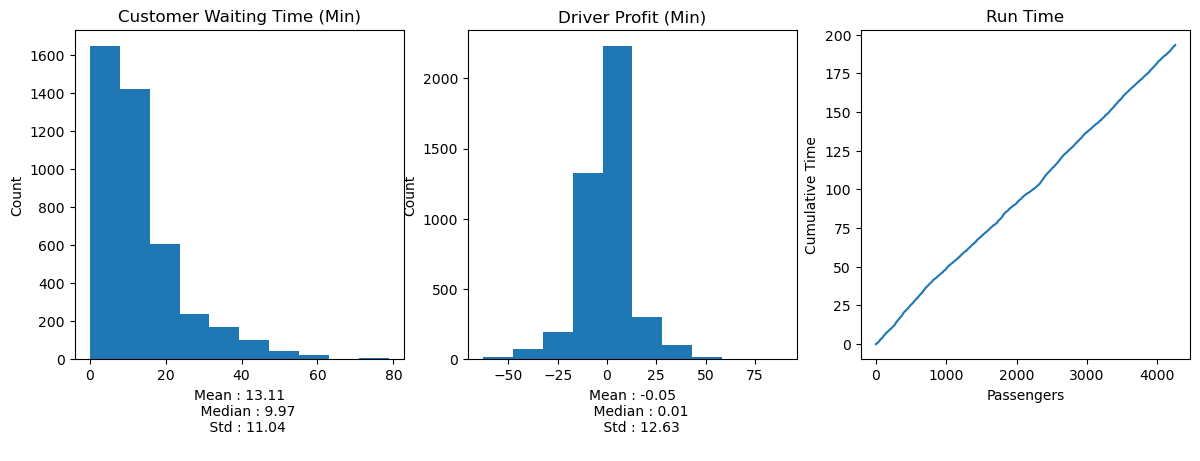

In [5]:
process_results(res_cus, res_driv, res_time)

# T2

In [6]:
def binary_search(drivers, time):
    left, mid, right = 0, 0, len(drivers) - 1
    
    while left <= right:
        mid = (left + right)//2
        if drivers[mid][0] < time:
            left = mid + 1
        elif drivers[mid][0] > time:
            right = mid - 1
        else:
            break
    
    return mid

def find_driver2(passenger, drivers, nodes, adj, find_path):
    eligible_point = binary_search(drivers, passenger[0])
    
    if drivers[eligible_point][0] > passenger[0]:
        eligible_point -= 1
    
    passenger_node = passenger[1]
    
    closest_node = None
    closest_dist = float('inf')
    for i in range(eligible_point + 1):
        driver_node = drivers[i][1]
        euclid = (nodes[driver_node]['lon'] - nodes[passenger_node]['lon'])**2
        euclid += (nodes[driver_node]['lat'] - nodes[passenger_node]['lat'])**2
        
        if euclid < closest_dist:
            closest_dist = euclid
            closest_node = (drivers[i], i)
    
    return closest_node

In [7]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver2, dijkstra)

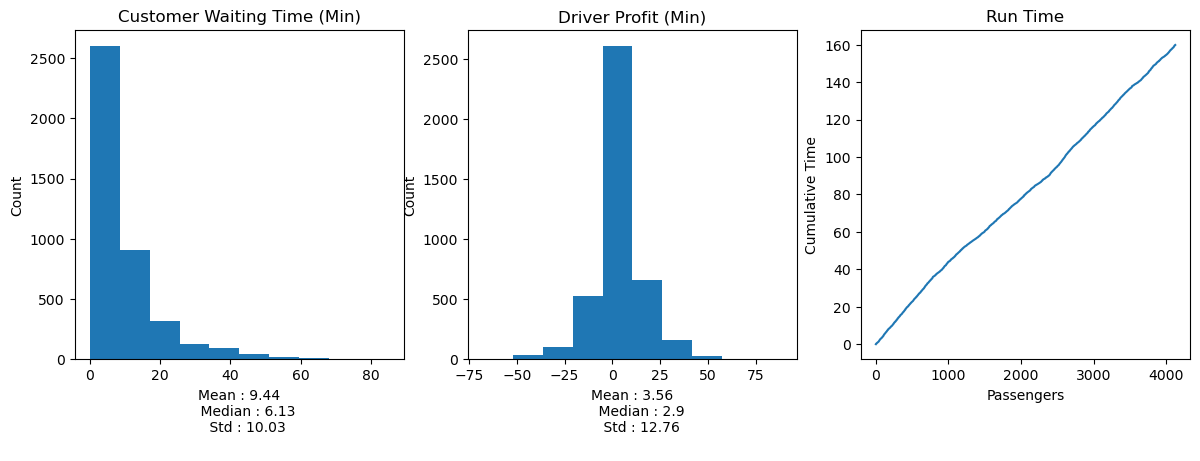

In [8]:
process_results(res_cus, res_driv, res_time)

# T3

In [17]:
PROB_STAY = 0.75
def find_driver3(passenger, drivers, nodes, adj, find_path):
    eligible_point = binary_search(drivers, passenger[0])
    passenger_node = passenger[1]
    
    if drivers[eligible_point][0] > passenger[0]:
        eligible_point -= 1
    
    closest_node = None
    closest_dist = float('inf')
    for i in range(eligible_point + 1):
        driver_node = drivers[i][1]
                 
        cap = get_edge_num(drivers[i][2], drivers[i][3])
        dist = find_path(driver_node, passenger[1], adj, nodes, cap)
        
        if dist < closest_dist:
            closest_dist = dist
            closest_node = (drivers[i], i)
    
    return closest_node

In [ ]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver3, dijkstra)

In [ ]:
process_results(res_cus, res_driv, res_time)

# T4

In [ ]:
res_cus, res_driv, res_time = match(fast_get_closest_node, find_driver3, astar)

In [ ]:
process_results(res_cus, res_driv, res_time)

# T5

In [14]:
def find_driver5(passenger, drivers, nodes, adj, find_path):
    nodes_label = pd.read_pickle('data/nodes_label.pkl')
    node_dists = pd.read_pickle('data/node_dists.pkl')
    
    closest_node = None
    closest_dist = float('inf')
    passenger_node = passenger[1]
    
    for i in range(len(drivers)):
        driver = drivers[i]
        driver_node = driver[1]
        
        if driver[0] > passenger[0]:
            return closest_node
        
        dist = node_dists[(nodes_label[driver_node], nodes_label[passenger_node])]
        
        if dist < closest_dist:
            closest_dist = dist
            closest_node = (driver, i)
        
        if dist == 0:
            return closest_node

In [15]:
res_cus, res_driv, res_time = match(fast_get_closest_node, find_driver5, astar)

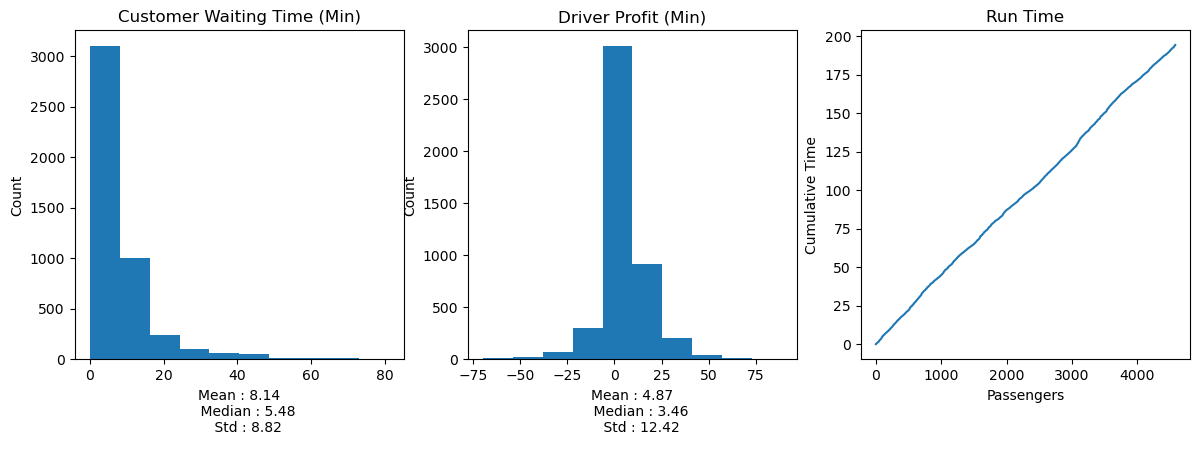

In [16]:
process_results(res_cus, res_driv, res_time)